## Парная линейная регрессия

1. Загрузить данные о котировках нескольких инструментов с сайта РТС (следите за тем, чтобы периоды выгрузки совпадали, иначе весь наш анализ не будет иметь смысл).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mvid = pd.read_csv('./data/MVID_101001_171001.txt')
sber = pd.read_csv('./data/SBER_101001_171001.txt')

In [3]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [4]:
res = pd.merge(sber, mvid, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [5]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

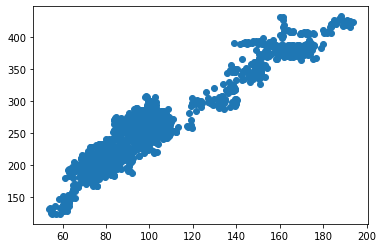

In [6]:
plt.figure()
plt.scatter(x, y)
plt.show()

2. Построить модель парной линейной регрессии с использованием метода градиентного спуска.

In [7]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    # метод предсказания результата по фактору
    def predict(self, x):
        return self.b0 + self.b1 * x

    # функция ошибки:
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 

    #метод градиентного спуска
    def BGD(self, X, Y):  
        alpha = 0.00005
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)

        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1
        
    def BGD_new(self, X, Y, alpha=0.000005, accuracy=0.01):
        steps, errors = [], []
        step = 0        
        old_err = hypothesis.error(self, X, Y)
        new_err = hypothesis.error(self, X, Y) - 1
        dJ = 1
        while dJ > accuracy:
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = hypothesis.error(self, X, Y)
            dJ = old_err - new_err          
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [8]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))

J = hyp.error(x, y)
print("initial error:", J) #ошибка очень большая

0
0
initial error: 36271.58344889084


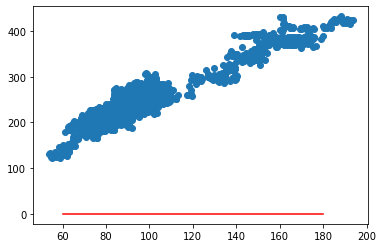

In [9]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [10]:
hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 6734.135540194945


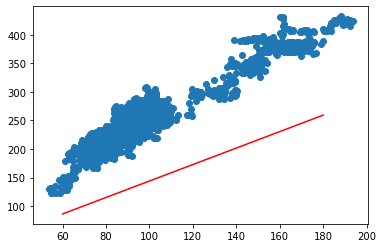

In [11]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [12]:
# применим метод градиетного спуска
hyp = hypothesis()
steps, errors = hyp.BGD_new(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)  #значение стало меньше

error after gradient descent: 298.76881676471504


3. Оценить на графике качество построенной модели.

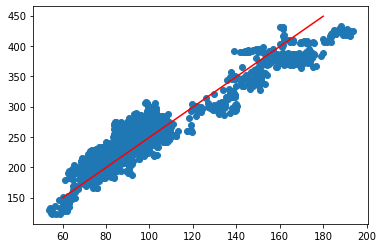

In [13]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

4. Построить кривые обучения.

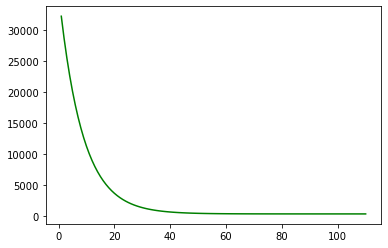

In [14]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

## Дополнительные задания


1. Постройте модель регрессии на другой паре инструментов.


In [15]:
spbe = pd.read_csv('./data/SNGS_210101_210228.txt')
moex = pd.read_csv('./data/ROSN_210101_210228.txt')

res_dd = pd.merge(spbe, moex, on='<DATE>')
res_dd.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y
0,SNGS,60,20210104,110000,36.345,ROSN,60,110000,438.25
1,SNGS,60,20210104,110000,36.345,ROSN,60,120000,436.60
2,SNGS,60,20210104,110000,36.345,ROSN,60,130000,436.75
3,SNGS,60,20210104,110000,36.345,ROSN,60,140000,436.85
4,SNGS,60,20210104,110000,36.345,ROSN,60,150000,436.90


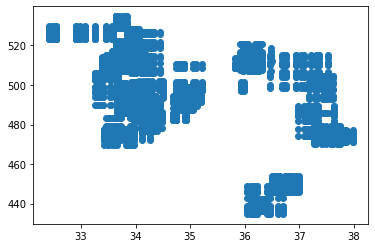

In [16]:
x1 = res_dd['<CLOSE>_x']
y1 = res_dd['<CLOSE>_y']

plt.figure()
plt.scatter(x1, y1)
plt.show()

In [17]:
hyp = hypothesis()
steps1, errors1 = hyp.BGD_new(x1, y1)
J = hyp.error(x1, y1)
print("error after gradient descent:", J)

error after gradient descent: 609.3986697454033


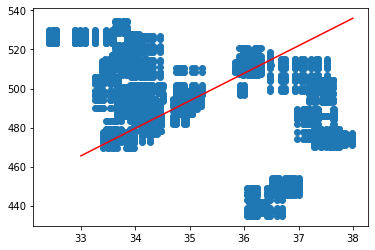

In [18]:
X01 = np.linspace(33, 38, 10)
Y01 = hyp.predict(X01)

plt.figure()
plt.scatter(x1, y1)
plt.plot(X01, Y01, 'r')
plt.show()

2. Модифицируйте класс регрессии так, чтобы он проводил обучение только на случайно выделенной части данных (обучающей выборке). Историю динамики ошибки отслеживать отдельно по обучающей и по тестовой выборке. 


In [19]:
class hypothesis1():
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.test_X = []
        self.train_X = []
        self.test_Y = []
        self.train_Y = []
        
    def get_selections(self, X, Y):
        self.train_X = X.sample(frac=.8,random_state=10)
        self.test_X = X.drop(self.train_X.index)
        self.train_Y = Y[self.train_X.index]
        self.test_Y = Y.drop(self.train_Y.index)
        
    # метод предсказания результата по фактору
    def predict(self, x):
        return self.b0 + self.b1 * x

    # функция ошибки:
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 

    #метод градиентного спуска
    def BGD_new(self, X, Y, alpha=0.000005, accuracy=0.01):
        hypothesis1.get_selections(self, X, Y)
        steps, errors_train, errors_test = [], [], []
        step = 0        
        old_train_err = hypothesis1.error(self, self.train_X, self.train_Y)
        new_train_err = hypothesis1.error(self, self.train_X, self.train_Y) - 1
        
        old_test_err = hypothesis1.error(self, self.test_X, self.test_Y)
        new_test_err = hypothesis1.error(self, self.test_X, self.test_Y) - 1
        dJ_train = 1
        dJ_test = 1
        while dJ_train > accuracy:
            dJ0 = sum(self.predict(self.train_X) - self.train_Y) /len(self.train_X)
            dJ1 = sum((self.predict(self.train_X) - self.train_Y) * self.train_X) /len(self.train_X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            
            old_train_err = new_train_err
            new_train_err = hypothesis1.error(self, self.train_X, self.train_Y)
            dJ_train = old_train_err - new_train_err 
            
            old_test_err = new_test_err
            new_test_err = hypothesis1.error(self, self.test_X, self.test_Y)
            dJ_test = old_test_err - new_test_err 
            
            step += 1            
            steps.append(step)
            
            errors_train.append(new_train_err)
            errors_test.append(new_test_err)
        return steps, errors_train, errors_test

In [20]:
hyp2 = hypothesis1()
steps2, errors2_train, errors2_test = hyp2.BGD_new(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 776904.504529065


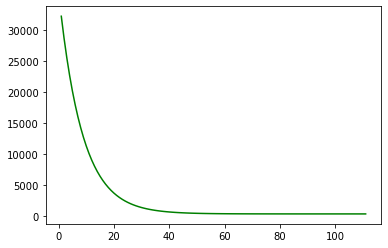

In [21]:
# динамика ошибки для обучаемой выборке
plt.figure()
plt.plot(steps2, errors2_train, 'g')
plt.show()

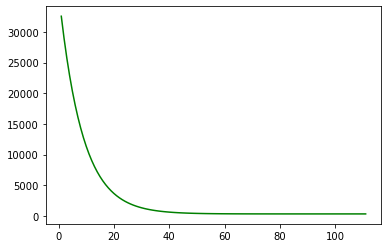

In [22]:
# динамика ошибки для тест выборке
plt.figure()
plt.plot(steps2, errors2_test, 'g')
plt.show()

3. Научиться использовать библиотеку sklearn для построения парной линейной регрессии:
    - Изучить официальную документацию библиотеки sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - По примеру программы регрессии, рассмотренной на семинаре, построить модель регрессии с использованием библиотечных средств
    - Сравнить результаты регрессии с использованием библиотечной функции и написанной самостоятельно.


In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [24]:
reg = LinearRegression().fit(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))

In [25]:
reg.score(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))

0.9111046169982557

In [26]:
reg.coef_ #b0

array([[1.99635191]])

In [27]:
reg.intercept_ #b1

array([56.01112869])

In [28]:
hyp = hypothesis()
steps, errors = hyp.BGD_new(x, y)
hyp.predict(x)

0       222.132656
1       224.102184
2       229.312709
3       227.393042
4       225.398583
           ...    
1753    480.041161
1754    482.933126
1755    478.595178
1756    479.517615
1757    481.187975
Name: <CLOSE>_x, Length: 1758, dtype: float64

In [29]:
np.array(y).reshape(-1, 1)

array([[194.38],
       [190.  ],
       [187.  ],
       ...,
       [423.1 ],
       [416.1 ],
       [422.5 ]])

In [30]:
hyp.b1

2.4930739956419132

In [31]:
hyp.b0

0.024693498835262742

In [32]:
метод Linear Regression основан на методе нааименьших квадратов. Отсюда такая разница в коэффициентах. 

SyntaxError: invalid syntax (<ipython-input-32-aeb662361cd1>, line 1)

## Контрольные вопросы

1. Сформулируйте задачу регрессии.

Задача регрессии – прогноз на основе выборки объектов с различными признаками. На выходе должно получиться вещественное число (2, 35, 76.454 и др.), к примеру цена квартиры, стоимость ценной бумаги по прошествии полугода, ожидаемый доход магазина на следующий месяц, качество вина при слепом тестировании.

2. Что такое метод наименьших квадратов?




МНК заключается в требовании построить такую аппроксимирующую
зависимость y(x), чтобы сумма квадратов отклонений была минимальной:
sum(y-y(x))^2 -> min

3. Какие функции ошибки используются в регрессионных моделях? Расскажите про три самые популярные.

    1. Средняя квадратическая ошибка (MSE)
        (1/n)sum(y-y(x))^2
    2. Средняя абсолютная ошибка (MAE)
         берется разница между предсказаниями модели и основополагающей правдой, применяется абсолютное значение к этой разнице и затем усредняете его по всему набору данных.
    3. Huber Loss

4. Что показывает конкретное значение ошибки регрессии?


Коэффициент показывает статистическую значимость модели (в зависимости то значения)